<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/Module_One_Project_country_vaccinations_Gabriel_Toubian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
data = files.upload()

Saving covid.csv to covid (1).csv


In [22]:
import pandas as pd

import io
covidall = pd.read_csv(io.BytesIO(data['covid.csv']))

In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt

In [25]:
covidall['Month'] = pd.to_datetime(covidall['date']).dt.to_period('M')

In [26]:
covidall['Week'] = pd.to_datetime(covidall['date']).dt.to_period('W')

In [27]:
covidspain = covidall[(covidall['country'] == 'Spain')]

In [28]:
covidfrance = covidall[(covidall['country'] == 'France')]

In [29]:
covidcanada = covidall[(covidall['country'] == 'Canada')]

In [30]:
covidthree = covidall.loc[(covidall.country == 'Spain') | (covidall.country =='Canada') | (covidall.country =='France')]

In [40]:
covid3clear =  covidthree[['country', 'daily_vaccinations', 'date', 'Week', 'Month']].copy()

In [52]:
covid3clear = covid3clear.dropna(how='any')

In [53]:
covid3clear

,country,daily_vaccinations,date,Week,Month
579,Canada,4282.0,2021-01-13,2021-01-11/2021-01-17,2021-01
580,Canada,7285.0,2021-01-14,2021-01-11/2021-01-17,2021-01
581,Canada,10736.0,2021-01-15,2021-01-11/2021-01-17,2021-01
582,Canada,14575.0,2021-01-16,2021-01-11/2021-01-17,2021-01
583,Canada,18415.0,2021-01-17,2021-01-11/2021-01-17,2021-01
...,...,...,...,...,...
3377,Spain,65225.0,2021-02-14,2021-02-08/2021-02-14,2021-02
3378,Spain,65324.0,2021-02-15,2021-02-15/2021-02-21,2021-02
3379,Spain,65315.0,2021-02-16,2021-02-15/2021-02-21,2021-02
3380,Spain,66035.0,2021-02-17,2021-02-15/2021-02-21,2021-02


In [61]:
covid3clear[covid3clear['country']=='France']

,country,daily_vaccinations,date,Week,Month
1311,France,39.0,2020-12-28,2020-12-28/2021-01-03,2020-12
1312,France,62.0,2020-12-29,2020-12-28/2021-01-03,2020-12
1313,France,75.0,2020-12-30,2020-12-28/2021-01-03,2020-12
1314,France,76.0,2020-12-31,2020-12-28/2021-01-03,2020-12
1315,France,62.0,2021-01-01,2020-12-28/2021-01-03,2021-01
1316,France,59.0,2021-01-02,2020-12-28/2021-01-03,2021-01
1317,France,61.0,2021-01-03,2020-12-28/2021-01-03,2021-01
1318,France,250.0,2021-01-04,2021-01-04/2021-01-10,2021-01
1319,France,944.0,2021-01-05,2021-01-04/2021-01-10,2021-01
1320,France,2404.0,2021-01-06,2021-01-04/2021-01-10,2021-01


In [42]:
import seaborn as sns


Text(0.5, 1.0, 'Vaccinations per day for 3 individual countries')

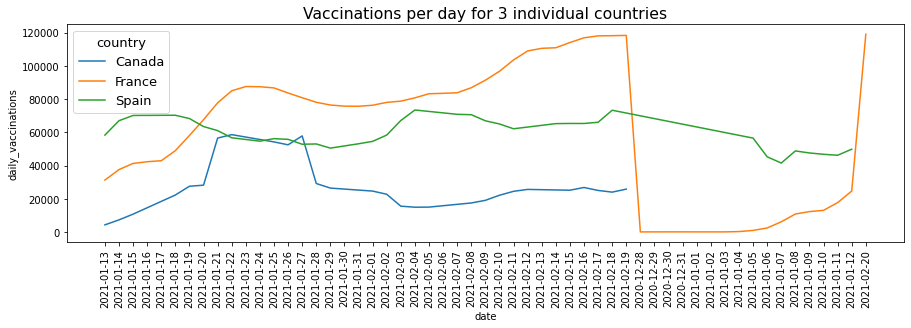

In [56]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covid3clear, x="date", y='daily_vaccinations', hue = 'country')
plt.xticks(rotation=90)
plt.title('Vaccinations per day for 3 individual countries')

In [70]:
str(covid3clear['Week'])
str(covid3clear['Month'])

'579     2021-01\n580     2021-01\n581     2021-01\n582     2021-01\n583     2021-01\n         ...   \n3377    2021-02\n3378    2021-02\n3379    2021-02\n3380    2021-02\n3381    2021-02\nName: Month, Length: 138, dtype: period[M]'

TypeError: ignored

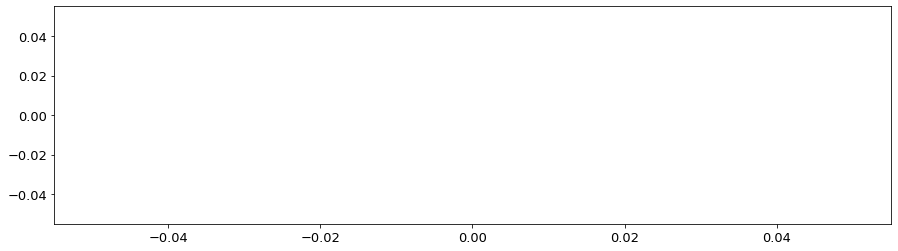

In [71]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.rcParams.update({'font.size': 13})
sns.lineplot(data=covid3clear, x="Week", y='daily_vaccinations', hue = 'country')
plt.xticks(rotation=90)
plt.title('Vaccinations per day for 3 individual countries')